In [2]:
import pandas as pd
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dados = pd.read_csv("Anatel.csv")
#dados = read_ods("Anatel.ods", 1)

In [32]:
print("Dimensão: {}".format(dados.size))
print("Linhas: {}".format(len(dados.index)))
print("Colunas: {}".format(len(dados.columns)))



linhas = dados.index
colunas = dados.columns
A_2 = ["A1_1", "A1_2", "A1_3", "A1_4"]

dados.info()



Dimensão: 9309951
Linhas: 147777
Colunas: 63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147777 entries, 0 to 147776
Data columns (total 63 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   IDTNS      147777 non-null  int64  
 1   TIPO       147777 non-null  object 
 2   OPERADORA  147777 non-null  object 
 3   ESTADO     147777 non-null  object 
 4   DATA       147777 non-null  object 
 5   ANO_BASE   147777 non-null  int64  
 6   Q1         147777 non-null  int64  
 7   Q2         122853 non-null  float64
 8   Q2_1       24924 non-null   float64
 9   Q2_2       24924 non-null   float64
 10  Q3         147777 non-null  int64  
 11  Q4         147777 non-null  int64  
 12  Q5         147777 non-null  int64  
 13  Q6         147777 non-null  int64  
 14  Q7         147777 non-null  int64  
 15  Q7a        147777 non-null  int64  
 16  Q8         147777 non-null  int64  
 17  J1         147777 non-null  int64  
 18  B1_1       147777 n

In [58]:
A_2_Integrate = list()

A_2_Integrate.append(0)

print(A_2_Integrate)

[0]


In [59]:
A_2_Integrate = list()

for i in linhas:
        if  dados.loc[i , "A1_4"] == 97:
            A_2_Integrate.append(0)
        elif dados.loc[i, "A1_1"] == 1 and dados.loc[i, "A1_2"] == 2 and dados.loc[i, "A1_3"] == 3:
            A_2_Integrate.append(7)
        elif dados.loc[i, "A1_1"] == 1 and dados.loc[i, "A1_2"] == 2 and np.isnan(dados.loc[i, "A1_3"]):
            A_2_Integrate.append(3)
        elif dados.loc[i, "A1_1"] == 1 and np.isnan(dados.loc[i, "A1_2"]) and np.isnan(dados.loc[i, "A1_3"]):
            A_2_Integrate.append(1)
        elif dados.loc[i, "A1_1"] == 1 and np.isnan(dados.loc[i, "A1_2"]) and dados.loc[i, "A1_3"] == 3:
            A_2_Integrate.append(5)
        elif np.isnan(dados.loc[i, "A1_1"]) and dados.loc[i, "A1_2"] == 2 and np.isnan(dados.loc[i, "A1_3"]):
            A_2_Integrate.append(2)
        elif np.isnan(dados.loc[i, "A1_1"]) and np.isnan(dados.loc[i, "A1_2"]) and dados.loc[i, "A1_3"] == 3:
            A_2_Integrate.append(4)
        elif np.isnan(dados.loc[i, "A1_1"]) and dados.loc[i, "A1_2"] == 2 and dados.loc[i, "A1_3"] == 3:
           A_2_Integrate.append(6)


In [64]:
##Remodelar dados para realizar o calculo de correlação

Data_Reshaped = dados.copy()
Data_Reshaped.insert(0, "A_2_Integrate", A_2_Integrate)

Data_Reshaped.drop("Q1", inplace= True, axis = 1)
Data_Reshaped.drop("Q2_1", inplace= True, axis = 1)
Data_Reshaped.drop("Q2_2", inplace= True, axis = 1)
Data_Reshaped.drop("Q3", inplace= True, axis = 1)
Data_Reshaped.drop("Q4", inplace= True, axis = 1)
Data_Reshaped.drop("Q6", inplace= True, axis = 1)
Data_Reshaped.drop("A1_1", inplace= True, axis = 1)
Data_Reshaped.drop("A1_2", inplace= True, axis = 1)
Data_Reshaped.drop("A1_3", inplace= True, axis = 1)
Data_Reshaped.drop("A1_4", inplace= True, axis = 1)







<AxesSubplot:>

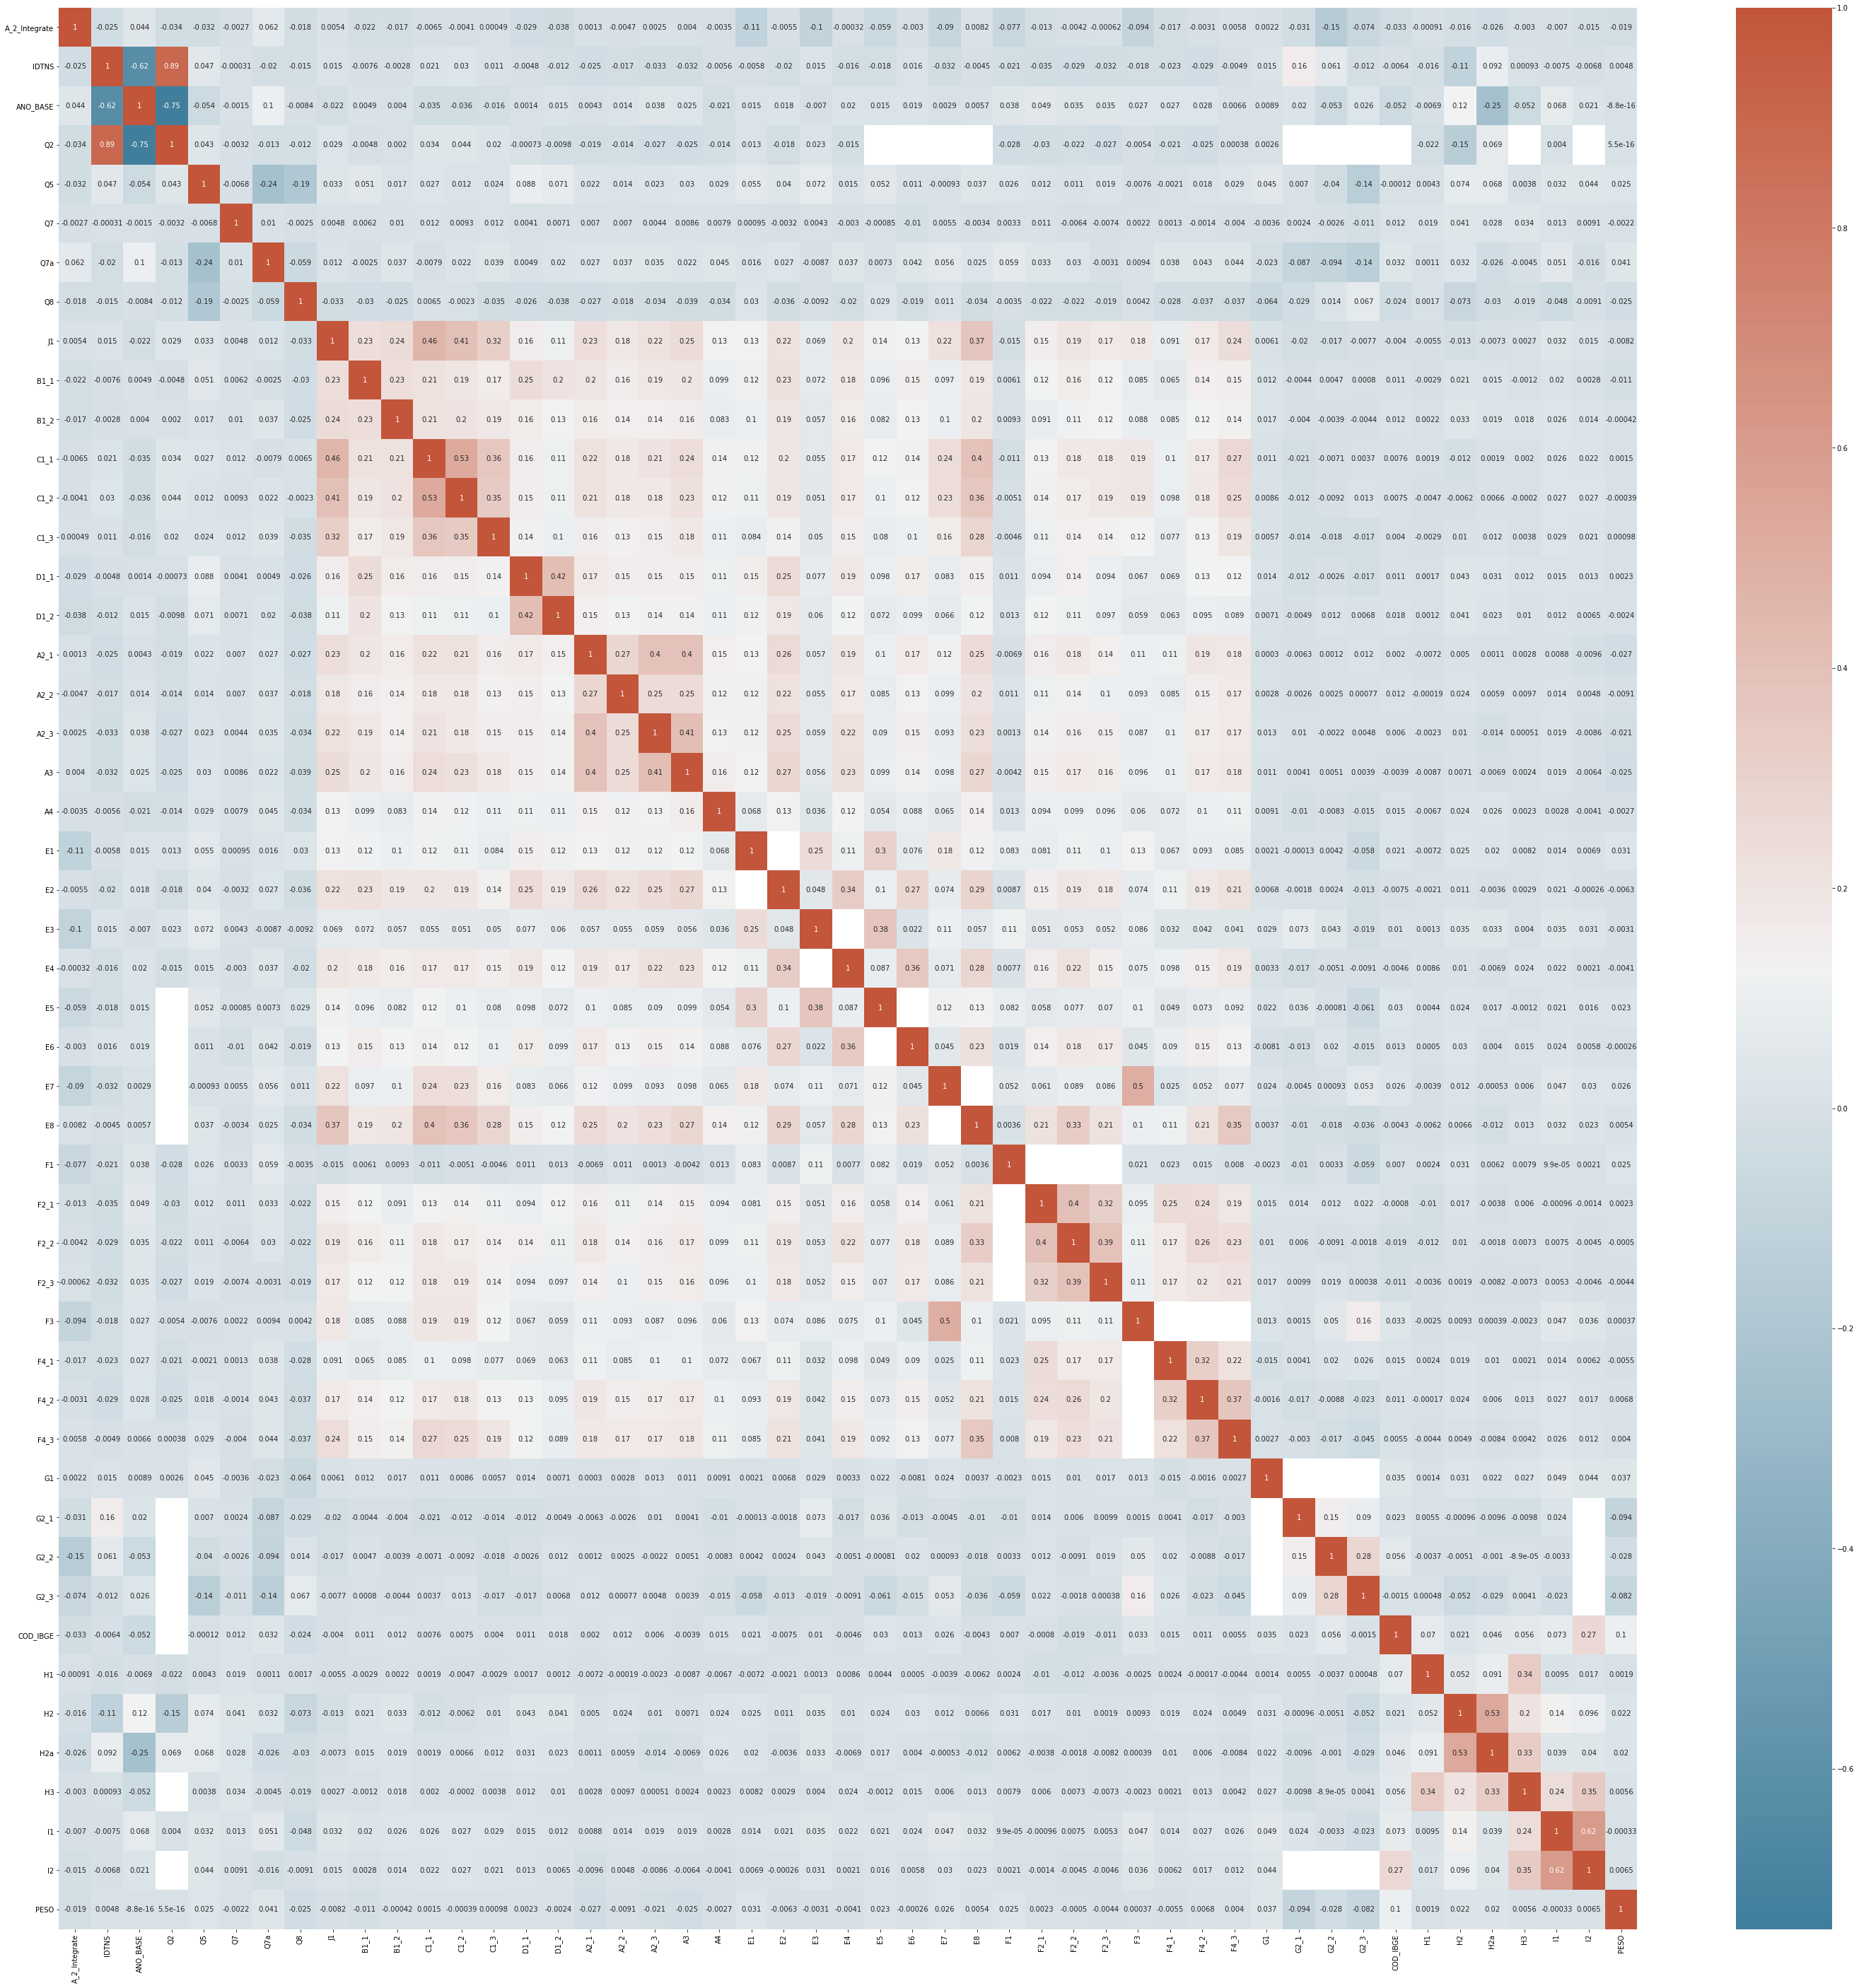

In [65]:
##Correlação
##Verificar com Correlação Matplot lib https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/ 
## https://seaborn.pydata.org/generated/seaborn.PairGrid.html

#heat map e pear grid e graficos temporais resolucao da imagem, 100dpi. colorido 

#ver todos os graficos, mapa das cidades

corr_matrix = Data_Reshaped.corr()
f, ax = plt.subplots(figsize=(50, 50))

#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap)



In [23]:


#corr_matrix["J1"].sort_values(ascending=False)

In [24]:
##Data Info
# Apresenta Informações de colunas e valores dos dados
#dados.info() 

# Separa os valores de cada coluna
#dados["OPERADORA"].value_counts()

#Apresenta uma descrição resumida dos dados
#Describe_Data = dados.describe()

dados["Q2_1"].value_counts()
dados["Q2_2"].value_counts()


2.0    24924
Name: Q2_2, dtype: int64

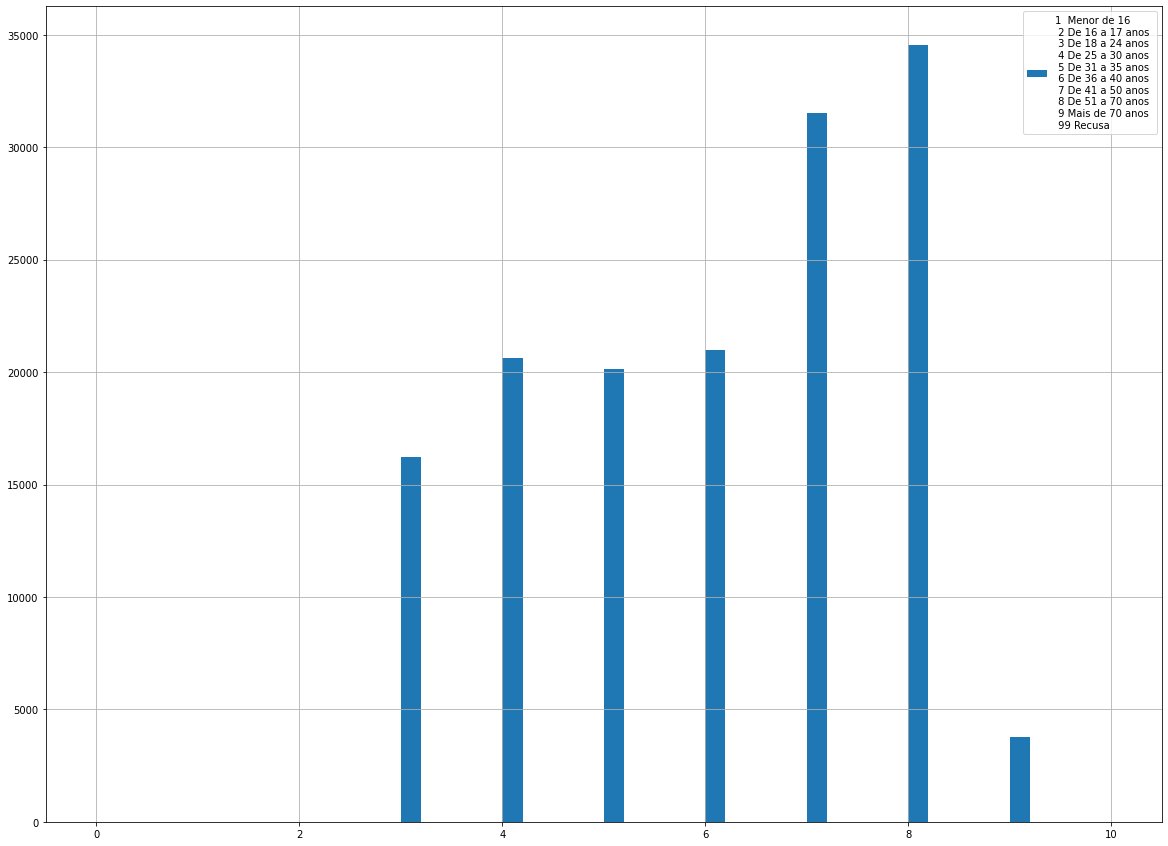

In [3]:
##Plots
#dados["OPERADORA"].hist(bins= 30, figsize=(20,15), align = "mid")
#dados["ANO_BASE"].hist(bins= 30, figsize=(20,15), align = "mid")
#dados["Q6"].hist(bins= 30, figsize=(20,15), align = "mid", label = "1 - Pessoa Fisica \n 2 - Pessoa Jurídica")
#dados["Q8"].hist(bins= 30, figsize=(20,15), align = "mid", label = "1 - Feminino \n 2 - Masculino")

#dados["ESTADO"].hist(bins= 60, figsize=(20,15), align = "mid")
#plt.legend()

#dados.hist(bins= 60, figsize=(60,45), align = "mid", sharex=False)
dados["Q7a"].hist(bins = 50 ,figsize=(20,15), align = "mid", range = [0,10], label = "1  Menor de 16 \n 2 De 16 a 17 anos \n 3 De 18 a 24 anos \n 4 De 25 a 30 anos \n 5 De 31 a 35 anos \n 6 De 36 a 40 anos \n 7 De 41 a 50 anos \n 8 De 51 a 70 anos \n 9 Mais de 70 anos \n 99 Recusa ")
plt.legend()


In [2]:
##Relação de Colunas com quantidades vazias
count = dados.isna().sum()
#isna - retorna 1 para NaN e 0 caso contrário
#sum - realiza as somas por colunas
print(count)

IDTNS            0
TIPO             0
OPERADORA        0
ESTADO           0
DATA             0
             ...  
H2a              0
H3           78584
I1               0
I2           77936
PESO             0
Length: 63, dtype: int64


In [10]:
## Linhas que apresentação avaliação 99 em Satisfação Geral

count = 0
Linhas_Invalidas = list() 
for i in linhas:
    if dados.loc[i , "J1"] == 99:
        Linhas_Invalidas.append(dados.loc[i , "IDTNS"])
        count = count + 1

print("Totais de Avaliações de Satisfação Geral inválidas: {}".format(count))
print("Os seguintes IDTNS apresentaram avaliação 99 em satisfação geral")
print(Linhas_Invalidas)


Totais de Avaliações de Satisfação Geral inválidas: 82
Os seguintes IDTNS apresentaram avaliação 99 em satisfação geral
[460371, 393512, 617112, 557223, 486657, 664283, 504864, 373736, 655270, 214162, 491249, 524992, 928539, 930916, 72862, 91089, 113944, 195564, 573385, 624534, 867398, 30794, 625115, 630294, 630440, 1012388, 101929, 669422, 327571, 337927, 698290, 426532, 442103, 518204, 557243, 726529, 828295, 926152, 931518, 740091, 771606, 406214, 740978, 464844, 541195, 288917, 358796, 780204, 756742, 584161, 836769, 812304, 859676, 836758, 625736, 585286, 862294, 407542, 13886, 177178, 910504, 467919, 186744, 248022, 310568, 419862, 578470, 21239312, 20222726, 10876194, 10532189, 20245604, 11149425, 10419702, 10161268, 10226764, 21140976, 10747120, 10821051, 10918535, 20544139, 20001614]


In [19]:
#Informações Gerais
Anos = list()
Operadoras = list()
Anos = dados["ANO_BASE"].unique()
Operadoras = dados["OPERADORA"].unique()
print(Anos)
print(Operadoras)

[2020 2019 2018 2017 2016 2015]
['CLARO/NET' 'OI' 'SERCOMTEL' 'SKY' 'TIM' 'UNIFIQUE' 'VIVO' 'ALGAR'
 'BRISANET' 'HUGHES' 'NET' 'COPEL' 'CABO TELEC' 'MULTIPLAY' 'BIG BRASIL'
 'GVT']


In [39]:
## Calculos Gerais
Media_Satisfacao_Geral = dados["J1"].mean()
Media_Operadoras = dict()
Soma = 0
Countagem = 0
for i in Operadoras:
    for j in linhas:
        if dados.loc[j, "OPERADORA"] == i:
            Soma = Soma + dados.loc[j , "J1"]
            Countagem = Countagem +1 
    Media_Operadoras[i] = Soma/Countagem
    Soma = 0
    Countagem = 0        

#Media_Operadoras dados["J1"].groupby("OPERADORA", as_index=False).mean()


print(Media_Satisfacao_Geral)
print(Media_Operadoras)

6.539894570873681
{'CLARO/NET': 6.694058942772493, 'OI': 6.01303317535545, 'SERCOMTEL': 7.185446009389671, 'SKY': 5.894287761349573, 'TIM': 7.359437280187573, 'UNIFIQUE': 7.793893129770993, 'VIVO': 6.730911273197304, 'ALGAR': 6.9101497504159735, 'BRISANET': 7.7099494097807755, 'HUGHES': 5.231891103548858, 'NET': 6.941815819008801, 'COPEL': 8.24773413897281, 'CABO TELEC': 7.743545611015491, 'MULTIPLAY': 7.171673819742489, 'BIG BRASIL': 6.77001404494382, 'GVT': 7.336938560913325}


In [11]:
Glossario = dict()
Glossario["IDTNS"] = "Identificação "
Glossario["TIPO"] = "Tipo de Serviço "
Glossario["OPERADORA"] = "Operadora "
Glossario["ESTADO"] = "Estado"
Glossario["DATA"] = "Data"
Glossario["ANO_BASE"] = "Ano"
Glossario["Q1"] = "Interesse em participar da Pesquisa"
Glossario["Q2"] = "Área de Trabalho do Entrevistado"
Glossario["Q2_1"] = "Área de Trabalho do Entrevistado Atualizado Pós 2016"
Glossario["Q2_2"] = "Área de Trabalho do Entrevistado Atualizado Pós 2016"
Glossario["Q3"] = "Usuário é cliente de internet fixa"
Glossario["Q4"] = " O entrevistado é um dos principais usuários da internet fixa da prestadora citada dentro da residência? "
Glossario["Q5"] = "O entrevistado é o responsável pelo pagamento dos gastos da internet fixa da prestadora citada"
Glossario["Q6"] = "Pessoa Física ou Pessoa Jurídica"
Glossario["Q7"] = "Idade"
Glossario["Q7a"] = "Reposta caso recusa de responder a Q7"
Glossario["Q8"] = "Sexo"
Glossario["J1"] = "Nível de satisfação geral do entrevistado com a prestadora citada"
Glossario["B1_1"] = "Nota atribuída com respeito à facilidade de entendimento dos planos e serviços contratados"
Glossario["B1_2"] = "Nota atribuída com respeito ao comprometimento da operadora em cumprir o que foi prometido e divulgado em sua publicidade."
Glossario["C1_1"] = "Notas atribuídas à cobrança de valores na conta de acordo com o contratado"
Glossario["C1_2"] = "Notas atribuídas à capacidade de manter a conexão sem quedas."
Glossario["C1_3"] = "Notas atribuídas à velocidade de navegação."
Glossario["D1_1"] =  "Notas atribuídas à cobrança dos valores na conta de acordo com o contratado"
Glossario["D1_2"] = "Notas atribuídas à clareza das informações na conta."
Glossario["A1_1"] = "o entrevistado utilizou o Atendimento Telefônico da prestadora nos seis meses anteriores à pesquisa?"
Glossario["A1_2"] = " o entrevistado utilizou o Atendimento pela Internet da prestadora nos seis meses anteriores à pesquisa?"
Glossario["A1_3"] = " o entrevistado utilizou o Atendimento na Loja da prestadora nos seis meses anteriores à pesquisa?"
Glossario["A1_4"] = "o entrevistado não utilizou os canais da prestadora citados anteriormente nos seis meses anteriores à pesquisa?"
Glossario["A2_1"] = "Nota Atribuita ao tempo de Espera, caso tenha respondido A1_1"
Glossario["A2_2"] =  "Notas atribuídas à necessidade de repetir a demanda, caso tenha respondido A1_1"
Glossario["A2_3"] = "Notas atribuídas à capacidade de esclarecimento por parte dos atendentes, , caso tenha respondido A1_1"
Glossario["A3"] = "Notas atribuídas à qualidade do Atendimento Telefônico da operadora, Somente se Respondeu A2_1"
Glossario["A4"] = " Notas atribuídas à qualidade do Atendimento pela Internet da operadora, Somente se respondeu A2_2"
Glossario["E1"] = "Descreve se o entrevistado entrou em contato com a operadora para falar sobre algum problema de cobrança nos 6 meses anteriores à pesquisa."
Glossario["E2"] = "Ocorre somente em caso de SIM ter sido escolhido em (E1). Nota atribuída à resolução do problema de cobrança da prestadora citada."
Glossario["E3"] = "Descreve se o usuário entrou em contato com a prestadora citada para alterar o plano ou alguma condição comercial nos 6 meses anteriores à pesquisa "
Glossario["E4"] = " Ocorre somente em caso de SIM ter sido escolhido em (E3). Nota atribuída à resolução da alteração do plano ou condição comercial."
Glossario["E5"] = "Descreve se o entrevistado entrou em contato com a operadora para cancelar serviços ou pacotes "
Glossario["E6"] = "Ocorre somente em caso de SIM ter sido escolhido em (E5). Nota atribuída à resolução do pedido de cancelamento de serviços ou pacotes"
Glossario["E7"] = " Descreve se o entrevistado entrou em contato com a operadora para falar sobre problemas de funcionamento da internet fixa"
Glossario["E8"] = "Ocorre somente em caso de SIM ter sido escolhido em (E7). Nota atribuída à resolução do problema de funcionamento da internet fixa "
Glossario["F1"] = " Descreve se o usuário solicitou instalação de internet fixa em seu endereço atual nos 6 meses anteriores à pesquisa. "
Glossario["F2_1"] = "Notas atribuídas ao tempo de espera entre a solicitação de instalação e a visita do técnico. "
Glossario["F2_2"] = "Cumprimento do prazo acordado para instalação."
Glossario["F2_3"] = "Qualidade da instalação do serviço."
Glossario["F3"] = "Descreve se o usuário solicitou algum tipo de reparo na sua internet fixa nos 6 meses anteriores à pesquisa"
Glossario["F4_1"] = "Notas atribuídas ao tempo de espera entre a solicitação de reparo e a visita do técnico."
Glossario["F4_2"] = "Cumprimento do prazo acordado para reparo."
Glossario["F4_3"] = "Qualidade do reparo do serviço."
Glossario["G1"] = "Existência de outra operadora que ofereça o mesmo serviço da atual, no local onde o entrevistado mora: "
Glossario["G2_1"] = " Contrato inclui TV por assinatura, dados a partir de 2019 "
Glossario["G2_2"] = " Contrato inclui Telefonia Móvel, dados a partir de 2019:"
Glossario["G2_3"] = "Contrato inclui Telefonia Fixa, dados a partir de 2019:"
Glossario["H0"] = "Município de residência do entrevistado: o entrevistador anota o município conforme informado pelo entrevistado"
Glossario["H1"] = "Quantidade de pessoas residentes que contribuem com a renda total do domicílio: o entrevistador anota o valor conforme informado pelo entrevistado"
Glossario["H2"] = "Renda mensal familiar: o entrevistador anota o valor conforme informado pelo entrevistado"
Glossario["H2a"] = "Depois de respondida a questão H2 ou em caso de recusa de identificação correta da renda, apresentam-se as opções por faixas de renda"
Glossario["H3"] =  "Não Identificado no Gloassario"
Glossario["I1"] = " : Autorização para identificação das respostas para a empresa que solicitou a pesquisa (2015) ou para a Anatel (a partir de 2016)."
Glossario["I2"] = " Autorização para identificação das respostas para a operadora citada. "
Glossario["PESO"] = "Peso do estrato (UF x prestadora) na amostra"
Glossario["COD_IBGE"] = "Código IBGE"
